<a href="https://colab.research.google.com/github/therealfortune/tensorflow-fortune/blob/master/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


--2021-12-16 01:17:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.250.65.80, 142.250.188.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   154MB/s    in 0.4s    

2021-12-16 01:17:29 (154 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

local_zip = "./cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

CREATING DIRECTORIES


In [4]:
base_dir = "./cats_and_dogs_filtered"

train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir , 'validation')

# Directories that contain our training cat and dog photos
train_cats_dir = os.path.join(train_dir , "cats")
train_dogs_dir = os.path.join(train_dir  , 'dogs')

# Directories that contain our validation cats and dogs photos
validation_cats_dir = os.path.join(validation_dir , 'cats')
validation_dogs_dir = os.path.join(validation_dir , 'dogs')

In [5]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.412.jpg', 'cat.290.jpg', 'cat.445.jpg', 'cat.87.jpg', 'cat.712.jpg', 'cat.857.jpg', 'cat.2.jpg', 'cat.335.jpg', 'cat.171.jpg', 'cat.833.jpg']
['dog.719.jpg', 'dog.392.jpg', 'dog.207.jpg', 'dog.465.jpg', 'dog.753.jpg', 'dog.862.jpg', 'dog.269.jpg', 'dog.806.jpg', 'dog.395.jpg', 'dog.503.jpg']


In [6]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


DISPLAYING TRAINING IMAGES

In [7]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# 4x4 configuration
nrows = 4
ncols = 4

# Index for image iteration
pic_index = 0

DISPLAYING FEW EXAMPLES OF OUR CATS AND DOGS

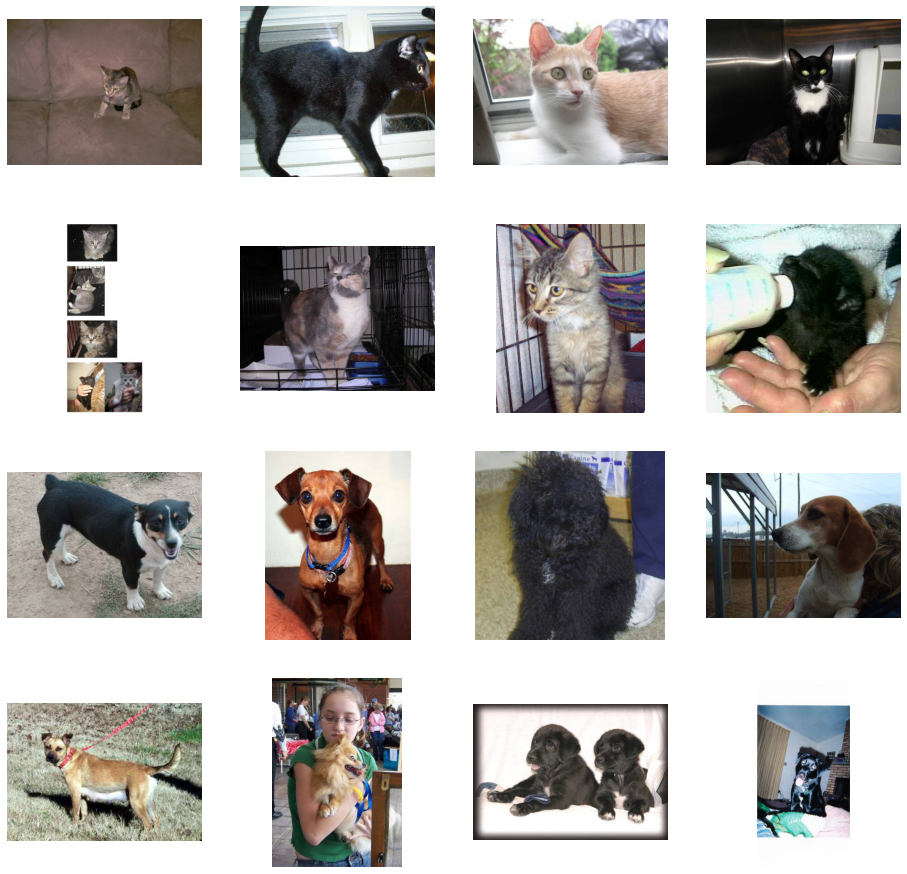

In [8]:
# Matplotlib fig, and sizing it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index +=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cats_fnames[pic_index-8:pic_index]
                ]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dogs_fnames[pic_index-8:pic_index]
                ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()              

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

DATA PROCESSING

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    verbose=2,
                    validation_data = validation_generator
                    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/15
100/100 - 52s - loss: 0.7108 - accuracy: 0.5150 - val_loss: 0.6715 - val_accuracy: 0.5630 - 52s/epoch - 517ms/step
Epoch 2/15
100/100 - 48s - loss: 0.6730 - accuracy: 0.5925 - val_loss: 0.6189 - val_accuracy: 0.6380 - 48s/epoch - 483ms/step
Epoch 3/15
100/100 - 49s - loss: 0.6064 - accuracy: 0.6745 - val_loss: 0.5637 - val_accuracy: 0.7210 - 49s/epoch - 486ms/step
Epoch 4/15
100/100 - 48s - loss: 0.5498 - accuracy: 0.7230 - val_loss: 0.5690 - val_accuracy: 0.7040 - 48s/epoch - 485ms/step
Epoch 5/15
100/100 - 49s - loss: 0.4943 - accuracy: 0.7575 - val_loss: 0.5477 - val_accuracy: 0.7140 - 49s/epoch - 487ms/step
Epoch 6/15
100/100 - 49s - loss: 0.4513 - accuracy: 0.7905 - val_loss: 0.5661 - val_accuracy: 0.7230 - 49s/epoch - 487ms/step
Epoch 7/15
100/100 - 49s - loss: 0.3891 - accuracy: 0.8210 - val_loss: 0.5525 - val_accuracy: 0.7510 - 49s/epoch - 488ms/step
Epoch 8/15
100/100 - 49s - loss: 0.3367 - accuracy: 0.8540 - val_loss: 0.6354 - val_accuracy: 0.7440 - 49s/epoch - 490

TESTING THE MODEL

In [15]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = "/content/" + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving dog2.jpg to dog2.jpg
Saving dog1.jpg to dog1.jpg
Saving cats2.jpg to cats2.jpg
Saving cats1.jpg to cats1.jpg
[1.]
dog2.jpg is a dog
[1.]
dog1.jpg is a dog
[0.]
cats2.jpg is a cat
[1.]
cats1.jpg is a dog
